In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Loading dataset

raw_data = '/workspaces/ML-credit-risk-prediction/dataset/credit_risk_dataset.csv'

raw_df = pd.read_csv(raw_data)

raw_df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


### General Exploration

In [3]:
# Checking number of lines and columns

print(f"Number of lines : {len(raw_df)}")
print(f"Number of columns : {len(raw_df.columns)}")

Number of lines : 32581
Number of columns : 12


In [4]:
# Checking type of data of each column

for columns in raw_df.columns:
    print(f"{columns} : {raw_df[columns].dtype}")


person_age : int64
person_income : int64
person_home_ownership : object
person_emp_length : float64
loan_intent : object
loan_grade : object
loan_amnt : int64
loan_int_rate : float64
loan_status : int64
loan_percent_income : float64
cb_person_default_on_file : object
cb_person_cred_hist_length : int64


In [5]:
# Renaming columns name

raw_df= raw_df.rename(columns={
    "person_age":"age",
    "person_income":"income",
    "person_home_ownership":"home_ownership",
    "person_emp_length":"emp_length",
    "cb_person_default_on_file":"historical_default",
    "cb_person_cred_hist_length":"hist_length"})

raw_df

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


**Data description**

age: Age

income: Annual Income

home_ownership: Type of home ownership

emp_length:	Employment length (in years)

loan_intent: Loan purpose

loan_grade : Loan grade

loan_amnt: Loan amount

loan_int_rate: Interest rate of the loan

loan_status: Loan status (0 is non default 1 is default)

loan_percent_income: Percent income

historical_default: Historical default (Yes [Y], No [N])

hist_length: Credit history length

### Missing Values

In [6]:
# Checking missing values in each column
nb_missing = raw_df.isnull().sum()
print(nb_missing)
                  

age                       0
income                    0
home_ownership            0
emp_length              895
loan_intent               0
loan_grade                0
loan_amnt                 0
loan_int_rate          3116
loan_status               0
loan_percent_income       0
historical_default        0
hist_length               0
dtype: int64


**Decision thresholds for missing values**

< 5% missing → low impact → keep

5%-15% → potential bias → imputation

In [7]:
# Calculate missing percentage for each column
percentage_miss = raw_df.isna().mean()*100
print(percentage_miss)

age                    0.000000
income                 0.000000
home_ownership         0.000000
emp_length             2.747000
loan_intent            0.000000
loan_grade             0.000000
loan_amnt              0.000000
loan_int_rate          9.563856
loan_status            0.000000
loan_percent_income    0.000000
historical_default     0.000000
hist_length            0.000000
dtype: float64


**Investigating Missing Values in 'loan_int_rate' column**

Before addressing the 9.56% of missing values in the *loan_int_rate* column, we must first investigate the underlying causes besides data entry issues. 

Understanding why these values are missing is crucial for determining the appropriate imputation strategy by asking the following questions:

In [8]:
# 1. Are the missing values related to the default ?
default_rate_missing = raw_df[raw_df['loan_int_rate'].isna()]['loan_status'].mean()
default_rate_present = raw_df[raw_df['loan_int_rate'].notna()]['loan_status'].mean()

print(f"Default percentage when values are missing: {default_rate_missing:.2%}")
print(f"Default percentage when values are present: {default_rate_present:.2%}")
print(f"Difference: {(default_rate_missing/default_rate_present - 1):.2%}")

Default percentage when values are missing: 20.67%
Default percentage when values are present: 21.94%
Difference: -5.79%


This analysis helps us check if the missing data conceals any hidden risk.

Based on the analysis, there is a slight negative relationship between missing interest rates and default probability.

 Loans with missing interest rates show a 20.67% default rate, compared to 21.94% for loans with recorded rates. As result of that, we have a difference of -5.79%. 
 
**This suggests that missing values are not associated with default.**

In [9]:
# 2.1 How are the missing values of loan rates related to loan intent ?
missing_by_intent = raw_df.groupby('loan_intent')['loan_int_rate'].apply(lambda x: x.isna().mean())
print(missing_by_intent)

loan_intent
DEBTCONSOLIDATION    0.097659
EDUCATION            0.092825
HOMEIMPROVEMENT      0.087379
MEDICAL              0.102125
PERSONAL             0.091831
VENTURE              0.098968
Name: loan_int_rate, dtype: float64


In [10]:
# 2.2 How are the missing values of loan rates related to loan amount ?
missing_by_amnt = raw_df.groupby('loan_amnt')['loan_int_rate'].apply(lambda x: x.isna().mean())
print(missing_by_amnt)

loan_amnt
500      0.200000
700      0.000000
725      0.000000
750      0.000000
800      0.000000
           ...   
33250    0.000000
33950    0.000000
34000    0.000000
34800    0.000000
35000    0.135135
Name: loan_int_rate, Length: 753, dtype: float64


In [11]:
# 2.3 How are the missing values of loan rates related to the historical default ?
missing_by_hist_def = raw_df.groupby('historical_default')['loan_int_rate'].apply(lambda x: x.isna().mean())
print(missing_by_hist_def)

historical_default
N    0.096289
Y    0.092602
Name: loan_int_rate, dtype: float64


This analysis aims to identify whether the absence of interest rates follows systematic patterns related to the case.

The variables *loan_intent*, *loan_amnt*, and *historical_default* are relevant because they respectively represent the purpose of the loan.

Missing values ​​are evenly distributed according to loan intent (all between 8.7% and 10.2%) and default history (9.6% vs. 9.3%).

Only *loan_amnt* shows some isolated spikes for specific amounts (€500: 20%, €35,000: 13.5%), but these amounts represent a limited volume of observations.

**No systematic pattern explains the missing values. The hypothesis of missing random data (MCAR) is strengthened, validating the standard imputation approach using loan_grade (since it directly determines the loan's interest rate).**

In [12]:
# STANDARD IMPUTATION APPROACH

# 1. Calculating median interest rate by loan grade
median_rate_by_grade = raw_df.groupby('loan_grade')['loan_int_rate'].median()

# 2. Creating an imputation flag BEFORE imputation
raw_df['was_int_rate_imputed'] = raw_df['loan_int_rate'].isna().astype(int)

# 3. Imputing missing values IN PLACE using the median of each loan grade
raw_df['loan_int_rate'] = raw_df['loan_int_rate'].fillna(
    raw_df['loan_grade'].map(median_rate_by_grade)
)

# 4. Verifying the imputation
print(f"Missing values before imputation: {raw_df['was_int_rate_imputed'].sum()}")
print(f"Missing values after imputation: {raw_df['loan_int_rate'].isna().sum()}")


Missing values before imputation: 3116
Missing values after imputation: 0


3116 missing rates were imputed (9.56% of data), using median rates that logically increase with risk grade (A=7.49%, G=26.90%). The flag shows 29,465 original values preserved and 3,116 imputed values created.

### Univariate Analysis

**Numerical variables**

In [13]:
# Descriptive statistical analysis
raw_df.describe()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,hist_length,was_int_rate_imputed
count,32581.000000,3.258100e+04,31686.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.013902,0.218164,0.170203,5.804211,0.095639
std,6.348078,6.198312e+04,4.142630,6322.086646,3.212250,0.413006,0.106782,4.055001,0.294099
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.880000,0.000000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.480000,0.000000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000


**Problems observed after the descriptive statistical analysis :**

**1) age:**

max is 144, outliner value and impossible for an age.

**action:** deleting lines where there are outliner values (higher than 75)


In [14]:
# age : identify number of lines higher than 75
outliner_age = raw_df['age']>75
count_outliner_age = outliner_age.sum()

print(count_outliner_age)

10


In [15]:
# age : delete lines higher than 75
new_df = raw_df[raw_df['age'] <= 75]
print(len(new_df))

32571


**2) income:**

The maximum annual income(6 000 000 dollars) being 91 times the mean (66 074 dollars) indicates extreme outline values. Also, as the standard deviation (61,983 dollars) is higher than the mean, it shows a heavily right‑skewed distribution with a long tail of very high incomes.

**action:** Capping extreme values of income with 99.5th percentile

In [16]:
# income : identify number of outliners

# Your current income distribution:
print(f"Mean income: ${round(new_df['income'].mean())}")
print(f"Max income: ${round(new_df['income'].max())}")
print(f"99.5th percentile: ${round(new_df['income'].quantile(0.995))}")


Mean income: $65883
Max income: $2039784
99.5th percentile: $300000


**Treatment of Extreme Incomes with the 99.5th Percentile Capping**

The income variable contains extreme values up to **\$2 039 784**, while the mean is **\$65 883**. Individuals in this income range are unlikely to seek small personal loans (\$5,000–\$35,000), suggesting data quality issues or unrealistic outliers.


In [17]:
# income :Cap income at 99.5th percentile

new_df2 = raw_df.copy()

income_cap = 300000 
new_df2['income_clean'] = new_df2['income'].clip(upper=income_cap)

# print number of rows affected
rows_affected = (new_df2['income'] > income_cap).sum()

print(f"Number of rows affected by capping : {rows_affected}")

Number of rows affected by capping : 138


**3) emp_length:**

The max is 123 years of employement which is impossible.

**action:**

We are going to considerate 40 being the maximum years of employment.

<0.5% of data → remove rows

≥0.5% of data → cap at 40

Zero values → treated as "unemployed" category

In [18]:
# 3. emp_length : identify percentage of outliners (lines above 40 years)
extreme_high = new_df2['emp_length'] > 40  
extreme_count = extreme_high.sum()
zero_emp = new_df2['emp_length'] < 0
zero_count = zero_emp.sum()

print(f"Rows with over than 40 years of employment : {extreme_count}")
print(f"Rows with 0 year of employment : {zero_count}")


Rows with over than 40 years of employment : 3
Rows with 0 year of employment : 0


Given the fact that there are only 3 rows with values higher than 40, we consider it safe to supress them without affecting the data quality of the dataset.

And since there are no values equal to 0, no need to label any row as 'unemployement'.

In [19]:
# emp_length : deleting rows over 40

new_df3 = new_df2[new_df2['emp_length']<=40]

new_df3

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,hist_length,was_int_rate_imputed,income_clean
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,9600
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,9600
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,65500
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,54400
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0,9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0,53000
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0,120000
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0,76000
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0,150000


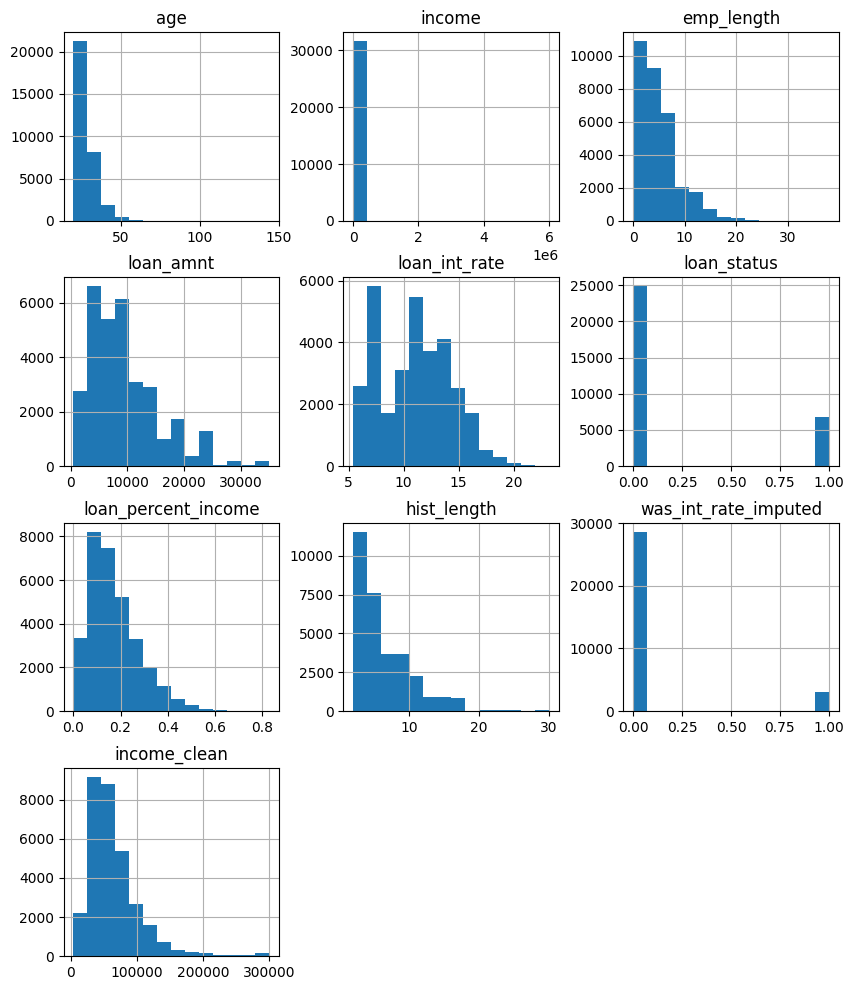

In [20]:
# Distribution : histogram
hist = new_df3.hist(bins=14,figsize=[10, 12])